In [3]:
library(gplots);
library(ggplot2);
library(dplyr) #ONLY USABLE ON KERNEL THAT HAS NO PHYLOLM


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




### BELOW: load raw data and take sample

In [6]:
opc_dir <- "~/geb/data/240_predictions_MatrixStacked.tsv"
#olig_dir <- "/ocean/projects/bio240054p/shared/project/240_predictions_matrix_celltypes/Oligo/"
opc_peaks <- as.matrix(read.csv(file = opc_dir, sep="\t", stringsAsFactors=F, header=T))
opc_peaks[1:5,1:5]
dim(opc_peaks)

hg38.chr1.827355.827856,X.1.0,X.1.0.1,X.1.0.2,X.1.0.3
hg38:chr1:1024878-1025379,0.514973,0.540576,0.725553,0.7387150
hg38:chr1:2547946-2548447,0.708904,-1.000000,0.478504,0.7080290
hg38:chr1:37554079-37554580,0.682599,-1.000000,0.656187,0.6956410
hg38:chr4:77819335-77819836,-1.000000,0.476115,0.578943,0.5108150
hg38:chr4:77820049-77820550,0.534672,0.801998,0.724545,0.6905950


[1] 183244    242

In [10]:
#take a random sample of 10000
opc_peaks_randsamp <- opc_peaks[sample(nrow(opc_peaks), 10000),]
opc_peaks_randsamp[1:5,1:5]
dim(opc_peaks_randsamp)

#save this sample for later to make loading easier
write.csv(opc_peaks_randsamp, file="~/geb/data/opc_randsamp.csv")

hg38.chr1.827355.827856,X.1.0,X.1.0.1,X.1.0.2,X.1.0.3
rheMac10:chr3:155475508-155476008:250,-1.000000,0.333577,0.597921,0.3376470
rheMac10:chr18:58133437-58133937:250,0.504291,-1.000000,0.789442,0.6324570
mm10:chr2:60962973-60963474,-1.000000,0.496151,0.744965,0.4033800
rn6:chr3:11382774-11383274:250,0.413678,-1.000000,-1.000000,0.7004590
rheMac10:chr10:10892176-10892676:250,0.544576,-1.000000,0.721769,0.5444200


[1] 10000   242

### DATA PROCESSING: USES DPLYR

In [5]:
#load random sample back in for future runs
opc_peaks_randsamp <- as.matrix(read.csv("~/geb/data/opc_randsamp.csv"))

In [6]:
#split by species of interest: hypselodonts vs non-hypselodonts
#first rename the columns to the species given in the text file
names <- readLines(con = "~/geb/data/240_predictions_NamesList.txt")
names <- c("", "Region", names)
names[1:5]

colnames(opc_peaks_randsamp) <- names
opc_peaks_randsamp[1:5, 1:5]

[1] ""                       "Region"                 "Acinonyx_jubatus"      
[4] "Acomys_cahirinus"       "Ailuropoda_melanoleuca"

,Region,Acinonyx_jubatus,Acomys_cahirinus,Ailuropoda_melanoleuca
1,rheMac10:chr3:155475508-155476008:250,-1.000000,0.333577,0.597921
2,rheMac10:chr18:58133437-58133937:250,0.504291,-1.000000,0.789442
3,mm10:chr2:60962973-60963474,-1.000000,0.496151,0.744965
4,rn6:chr3:11382774-11383274:250,0.413678,-1.000000,-1.000000
5,rheMac10:chr10:10892176-10892676:250,0.544576,-1.000000,0.721769


In [7]:
#first get list of hypselodonts
#this dataframe was made using the phenotype information data
hyps_data <- read.csv("~/geb/data/hypselodonts_known.csv")

library(dplyr)
hyps <- hyps_data %>% filter(Hypselodonty == 1)
nonhyps <- hyps_data %>% filter(Hypselodonty == 0)

hyps_names <- hyps$Name
nonhyps_names <- nonhyps$Name

In [8]:
#now we can select hypselodonts
hyps_opc_peaks <- as.data.frame(opc_peaks_randsamp) %>% select(any_of(hyps_names))
hyps_opc_peaks[1:5, 1:5]

,Acomys_cahirinus,Allactaga_bullata,Aplodontia_rufa,Castor_canadensis,Catagonus_wagneri
,<chr>,<chr>,<chr>,<chr>,<chr>
1,0.333577,0.466885,0.454568,0.420941,0.726793
2,-1.000000,0.336123,0.819937,-1.000000,0.546719
3,0.496151,0.582556,0.560527,0.475063,0.766712
4,-1.000000,0.679630,0.519685,0.499033,0.653173
5,-1.000000,0.535001,0.405925,0.492735,0.436828


In [9]:
rownames(hyps_opc_peaks) <- opc_peaks_randsamp[,"Region"]
hyps_opc_peaks[1:5, 1:5]
dim(hyps_opc_peaks)

,Acomys_cahirinus,Allactaga_bullata,Aplodontia_rufa,Castor_canadensis,Catagonus_wagneri
,<chr>,<chr>,<chr>,<chr>,<chr>
rheMac10:chr3:155475508-155476008:250,0.333577,0.466885,0.454568,0.420941,0.726793
rheMac10:chr18:58133437-58133937:250,-1.000000,0.336123,0.819937,-1.000000,0.546719
mm10:chr2:60962973-60963474,0.496151,0.582556,0.560527,0.475063,0.766712
rn6:chr3:11382774-11383274:250,-1.000000,0.679630,0.519685,0.499033,0.653173
rheMac10:chr10:10892176-10892676:250,-1.000000,0.535001,0.405925,0.492735,0.436828


[1] 10000    63

In [10]:
nonhyps_opc_peaks <- as.data.frame(opc_peaks_randsamp) %>% select(any_of(nonhyps_names))
rownames(nonhyps_opc_peaks) <- opc_peaks_randsamp[,"Region"]
nonhyps_opc_peaks[1:5, 1:5]
dim(nonhyps_opc_peaks)

,Acinonyx_jubatus,Ailuropoda_melanoleuca,Ailurus_fulgens,Alouatta_palliata,Ammotragus_lervia
,<chr>,<chr>,<chr>,<chr>,<chr>
rheMac10:chr3:155475508-155476008:250,-1.000000,0.597921,0.337647,0.437756,0.601379
rheMac10:chr18:58133437-58133937:250,0.504291,0.789442,0.632457,0.695482,0.725380
mm10:chr2:60962973-60963474,-1.000000,0.744965,0.403380,0.311648,0.734923
rn6:chr3:11382774-11383274:250,0.413678,-1.000000,0.700459,0.576341,-1.000000
rheMac10:chr10:10892176-10892676:250,0.544576,0.721769,0.544420,0.704795,-1.000000


[1] 10000   146

### PART 2: OPEN CHROMATIN DIFFERENCES

In [11]:
#code to do this part borrowed from HW2
diffPvaluesV <- rep(NA,nrow(hyps_opc_peaks)); #Create an empty vector to store the p-values per open chromatin region in
names(diffPvaluesV) <- rownames(hyps_opc_peaks); #Name that vector with the peak names
diffMeansV <- diffPvaluesV #Create a new vector, also empty, to store the differences across species

#modified to do hypselodonts
peak_ids <- rownames(hyps_opc_peaks)
for(curPeak in peak_ids) { #Loop through each of the peaks
  hypVals <- as.numeric(hyps_opc_peaks[curPeak,]); #For that peak get the HYPSELODONT predicitons
  nonHypVals <- as.numeric(nonhyps_opc_peaks[curPeak,]); #For that peak get the NON-HYPSELODONT predicitons
    if(sd(hypVals,na.rm=T) > 0 && sd(nonHypVals,na.rm=T) > 0) { #Ensure that standard deviation greater than 0
      curTtest <- t.test(x=hypVals,y=nonHypVals);
      diffPvaluesV[curPeak] <- curTtest$p.value
      diffMeansV[curPeak] <- mean(hypVals,na.rm=T) - mean(nonHypVals,na.rm=T);
    }
}

diffResultsF <- data.frame(id=peak_ids, meanDiff=diffMeansV, pvalue=diffPvaluesV, padj = p.adjust(diffPvaluesV))
diffResultsSortF <- diffResultsF[order(diffResultsF$padj),]
diffResultsSortF[1:10,]

,id,meanDiff,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>
rheMac10:chr14:94018099-94018599:250,rheMac10:chr14:94018099-94018599:250,-1.166841,3.739627e-40,3.611358e-36
rheMac10:chr7:14970683-14971183:250,rheMac10:chr7:14970683-14971183:250,-1.156606,5.290916e-40,5.108908e-36
rheMac10:chr13:83999136-83999636:250,rheMac10:chr13:83999136-83999636:250,-1.068573,7.480792e-39,7.222705e-35
rheMac10:chr16:16917684-16918184:250,rheMac10:chr16:16917684-16918184:250,-1.041467,1.478127e-36,1.426984e-32
rheMac10:chr2:2753620-2754120:250,rheMac10:chr2:2753620-2754120:250,-1.226441,2.839644e-35,2.741108e-31
hg38:chr6:109448294-109448795,hg38:chr6:109448294-109448795,-1.209471,6.643296e-34,6.412110e-30
rheMac10:chr20:11629969-11630469:250,rheMac10:chr20:11629969-11630469:250,-1.263702,6.831316e-33,6.592903e-29
hg38:chr4:82900421-82900922,hg38:chr4:82900421-82900922,-1.291502,9.475720e-33,9.144069e-29
rheMac10:chr19:4974357-4974857:250,rheMac10:chr19:4974357-4974857:250,-1.068616,1.409556e-32,1.360080e-28


#### USING PHYLOLM: REQUIRES NEW KERNEL WITHOUT DPLYR
I honestly think the results are similar to using the t-test but we will do this anyway.

In [10]:
#modify the data so that the variables are on the top, animals on the side, add hypselodonty
library(tidyr)
hypsTemp <- t(hyps_opc_peaks)
hypsTemp <- as.data.frame(hypsTemp)
hypsTemp <- hypsTemp %>% mutate(Hypselodont = 1)

nonhypsTemp <- t(nonhyps_opc_peaks)
nonhypsTemp <- as.data.frame(nonhypsTemp)
nonhypsTemp <- nonhypsTemp %>% mutate(Hypselodont = 0)

combined_hyp_peaks <- bind_rows(hypsTemp, nonhypsTemp)
combined_hyp_peaks[1:5, 1:5]
dim(combined_hyp_peaks)

#write this as csv so that we can read it in to do phylolm
write.csv(combined_hyp_peaks, file="~/geb/data/hyps_opc_peaks.csv")

,rheMac10:chr3:155475508-155476008:250,rheMac10:chr18:58133437-58133937:250,mm10:chr2:60962973-60963474,rn6:chr3:11382774-11383274:250,rheMac10:chr10:10892176-10892676:250
,<chr>,<chr>,<chr>,<chr>,<chr>
Acomys_cahirinus...1,0.333577,-1.000000,0.496151,-1.000000,-1.000000
Allactaga_bullata...2,0.466885,0.336123,0.582556,0.679630,0.535001
Aplodontia_rufa...3,0.454568,0.819937,0.560527,0.519685,0.405925
Castor_canadensis...4,0.420941,-1.000000,0.475063,0.499033,0.492735
Catagonus_wagneri...5,0.726793,0.546719,0.766712,0.653173,0.436828


[1]   126 10001

In [ ]:
library(phylolm)
library(janitor)
zoonomiaTree <- read.tree(file = "~/geb/data/Zoonomia_ChrX_lessGC40_241species_30Consensus.tree")

#load in data from earlier:
combined_hyp_peaks <- clean_names(combined_hyp_peaks)
peakNames <- colnames(combined_hyp_peaks)
peakNames <- peakNames[! peakNames %in% c('hypselodont')]

In [ ]:
PvaluesPHY <- rep(NA,nrow(hyps_opc_peaks))
names(PvaluesPHY) <- rownames(hyps_opc_peaks)
corrsPHY <- PvaluesPHY
slopesPHY <- PvaluesPHY

curIndex = 1

for(curPeak in peakNames) {
    peakLmFit <- phylolm(as.numeric(combined_hyp_peaks[,curIndex]) ~ hypselodont, 
                         data=combined_hyp_peaks, 
                         phy=zoonomiaTree, model="BM")
    peakLmFitSum <- summary(peakLmFit)
    
    PvaluesPHY[curPeak] <- peakLmFitSum$coefficients[8]
    slopesPHY[curPeak] <- peakLmFitSum$coefficients[2]
    #print(peakLmFitSum$coefficients[8])
    corrsPHY[curPeak] <- peakLmFitSum$adj.r.squared
    curIndex <- curIndex + 1
}

phyloRes <- data.frame(id=peakNames, r_squared_adj=corrsPHY,
                       effect_size=slopesPHY,pvalue=PvaluesPHY, 
                       padj = p.adjust(PvaluesPHY))
phyloRes <- phyloRes[order(phyloRes$padj),]

write.csv(phyloRes, file="phyloRes.csv")

In [12]:
#reading in dataset of results: make this easier for all of us
phyloRes <- read.csv("~/geb/data/phyloRes.csv")

#number with padj below 0.1
nrow(phyloRes %>% filter(padj < 0.1)) #switch back to dplyr
nrow(diffResultsSortF %>% filter(padj < 0.1))

[1] 78

[1] 1528

#### Plotting Histograms
First, for the t-test:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 343 rows containing non-finite outside the scale range (`stat_bin()`).”


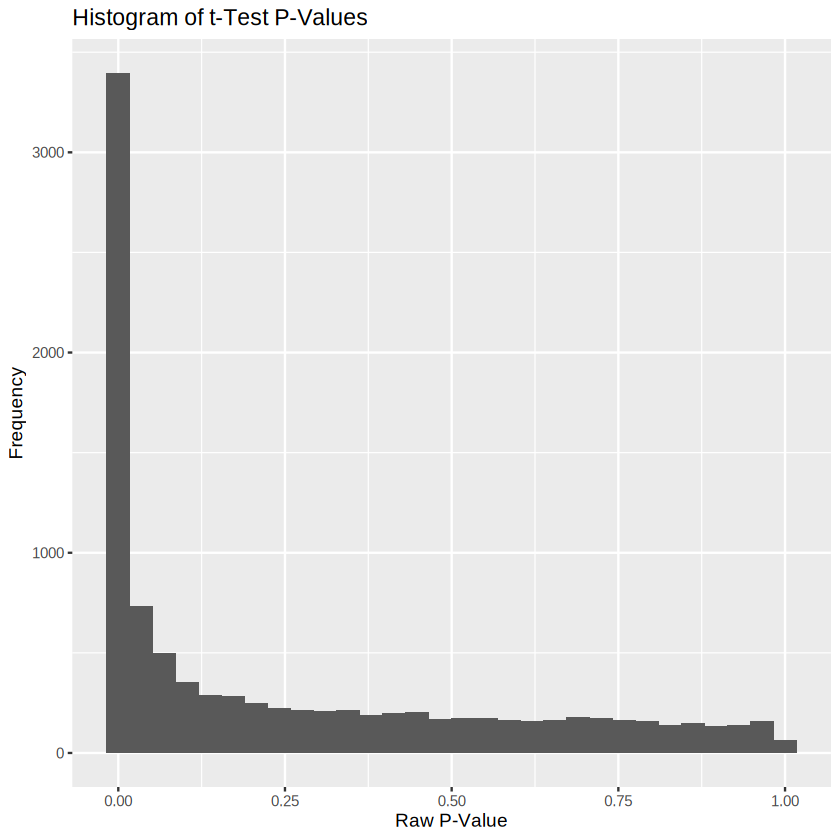

In [62]:
ggplot(data = diffResultsSortF, aes(x=pvalue)) +
    geom_histogram() +
    labs(x = "Raw P-Value",
         y = "Frequency",
         title = "Histogram of t-Test P-Values")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 343 rows containing non-finite outside the scale range (`stat_bin()`).”


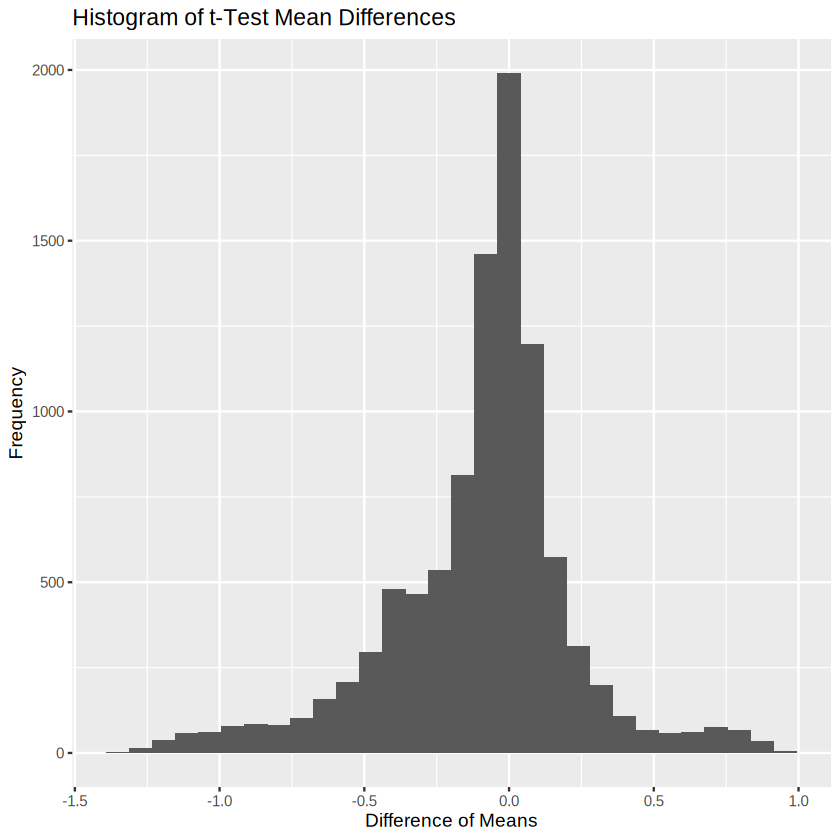

In [63]:
ggplot(data = diffResultsSortF, aes(x=meanDiff)) +
    geom_histogram() +
    labs(x = "Difference of Means",
         y = "Frequency",
         title = "Histogram of t-Test Mean Differences")

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 10000 rows containing non-finite outside the scale range
(`stat_bin()`).”
`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 10000 rows containing non-finite outside the scale range
(`stat_bin()`).”


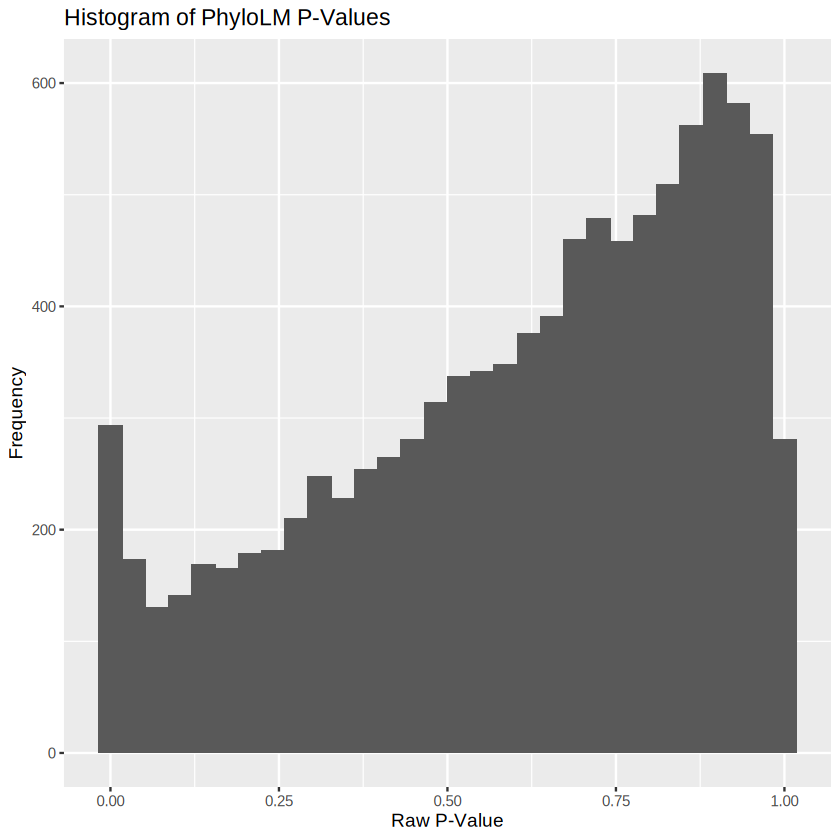

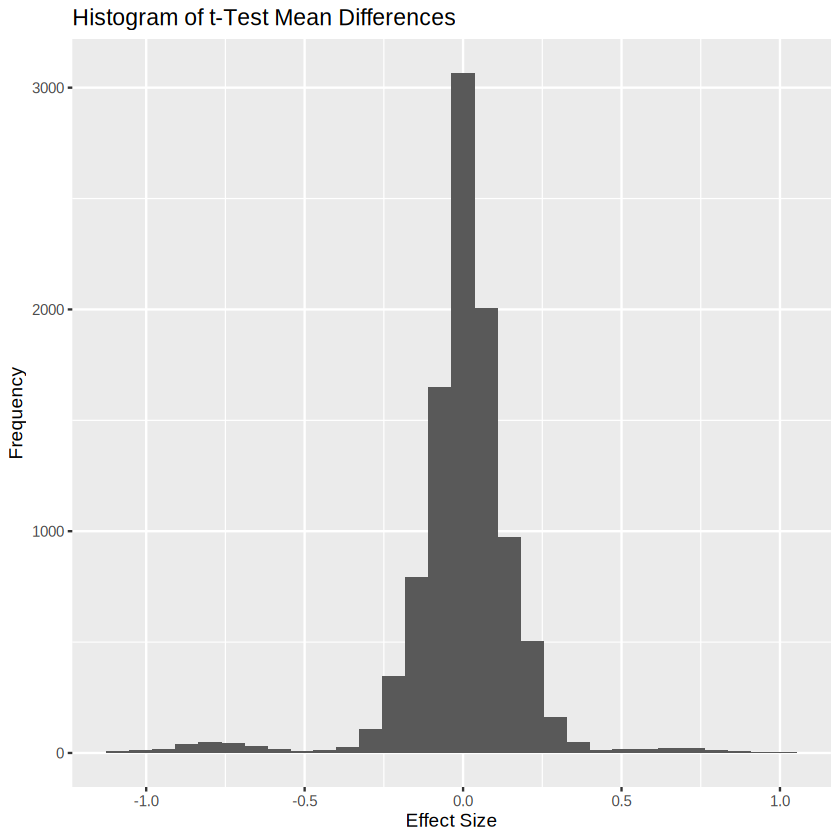

In [13]:
#phyloLM results
ggplot(data = phyloRes, aes(x=pvalue)) +
    geom_histogram() +
    labs(x = "Raw P-Value",
         y = "Frequency",
         title = "Histogram of PhyloLM P-Values")

ggplot(data = phyloRes, aes(x=effect_size)) +
    geom_histogram() +
    labs(x = "Effect Size",
         y = "Frequency",
         title = "Histogram of t-Test Mean Differences")

In [14]:
#finding most positively and negatively associated peak
#first with PhyloLM, using pos/neg slope. 
phyloResPos <- phyloRes %>% filter(effect_size > 0)
phyloResNeg <- phyloRes %>% filter(effect_size < 0)
phyloResPos[1:5]
phyloResNeg[1:5]

X,id,r_squared_adj,effect_size,pvalue
<chr>,<chr>,<dbl>,<dbl>,<dbl>
rhe_mac10_chr1_207215838_207216338_250,rhe_mac10_chr1_207215838_207216338_250,0.14099222,0.7412123,1.268098e-08
rn6_chr2_149430176_149430676_250,rn6_chr2_149430176_149430676_250,0.13333142,0.7915858,3.260346e-08
rn6_chr4_136650730_136651230_250,rn6_chr4_136650730_136651230_250,0.13207253,0.9886597,3.805173e-08
rn6_chr10_6009669_6010169_250,rn6_chr10_6009669_6010169_250,0.12941551,0.9055822,5.269401e-08
rn6_chr19_30669236_30669736_250,rn6_chr19_30669236_30669736_250,0.12234846,0.6820978,1.247845e-07
rn6_chr6_74415125_74415625_250,rn6_chr6_74415125_74415625_250,0.12201007,0.6888503,1.300255e-07
rn6_chr9_93044990_93045490_250,rn6_chr9_93044990_93045490_250,0.11966662,0.9308011,1.728325e-07
rhe_mac10_chr4_162002124_162002624_250,rhe_mac10_chr4_162002124_162002624_250,0.11155448,0.9388924,4.608473e-07
rhe_mac10_chr_x_43664557_43665057_250,rhe_mac10_chr_x_43664557_43665057_250,0.10810859,0.8548935,6.976185e-07


X,id,r_squared_adj,effect_size,pvalue
<chr>,<chr>,<dbl>,<dbl>,<dbl>
mm10_chr4_111545923_111546424,mm10_chr4_111545923_111546424,0.2384567,-0.8767500,3.836234e-14
rn6_chr11_64640798_64641298_250,rn6_chr11_64640798_64641298_250,0.2378756,-0.8960552,4.156142e-14
hg38_chr7_107168424_107168925,hg38_chr7_107168424_107168925,0.2272678,-0.8646728,1.775626e-13
rn6_chr9_29752547_29753047_250,rn6_chr9_29752547_29753047_250,0.2087134,-1.1062516,2.154106e-12
rn6_chr5_133377255_133377755_250,rn6_chr5_133377255_133377755_250,0.2027579,-0.7811271,4.744511e-12
rhe_mac10_chr13_54846823_54847323_250,rhe_mac10_chr13_54846823_54847323_250,0.1999146,-0.9408392,6.903729e-12
rn6_chr1_141842205_141842705_250,rn6_chr1_141842205_141842705_250,0.1972817,-0.9000456,9.759962e-12
hg38_chr1_101025840_101026341,hg38_chr1_101025840_101026341,0.1943420,-0.9355276,1.434826e-11
rhe_mac10_chr8_33911702_33912202_250,rhe_mac10_chr8_33911702_33912202_250,0.1862287,-1.0309923,4.128784e-11


In [15]:
#t-tests now
tResPos <- diffResultsSortF %>% filter(meanDiff > 0)
tResNeg <- diffResultsSortF %>% filter(meanDiff < 0)
tResNeg[1:5,]
tResPos[1:5,]

,id,meanDiff,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>
rheMac10:chr14:94018099-94018599:250,rheMac10:chr14:94018099-94018599:250,-1.166841,3.739627e-40,3.611358e-36
rheMac10:chr7:14970683-14971183:250,rheMac10:chr7:14970683-14971183:250,-1.156606,5.290916e-40,5.108908e-36
rheMac10:chr13:83999136-83999636:250,rheMac10:chr13:83999136-83999636:250,-1.068573,7.480792e-39,7.222705e-35
rheMac10:chr16:16917684-16918184:250,rheMac10:chr16:16917684-16918184:250,-1.041467,1.478127e-36,1.426984e-32
rheMac10:chr2:2753620-2754120:250,rheMac10:chr2:2753620-2754120:250,-1.226441,2.839644e-35,2.741108e-31


,id,meanDiff,pvalue,padj
,<chr>,<dbl>,<dbl>,<dbl>
hg38:chr9:132192625-132193126,hg38:chr9:132192625-132193126,0.9862388,1.535586e-18,1.444833e-14
rn6:chr18:4130584-4131084:250,rn6:chr18:4130584-4131084:250,0.9344181,3.768093e-18,3.542007e-14
hg38:chr10:133162494-133162995,hg38:chr10:133162494-133162995,0.9228186,4.254946e-18,3.999223e-14
rheMac10:chr11:6360240-6360740:250,rheMac10:chr11:6360240-6360740:250,0.9652879,8.425580e-18,7.909935e-14
rn6:chr7:130083139-130083639:250,rn6:chr7:130083139-130083639:250,0.9036107,1.576267e-17,1.479484e-13


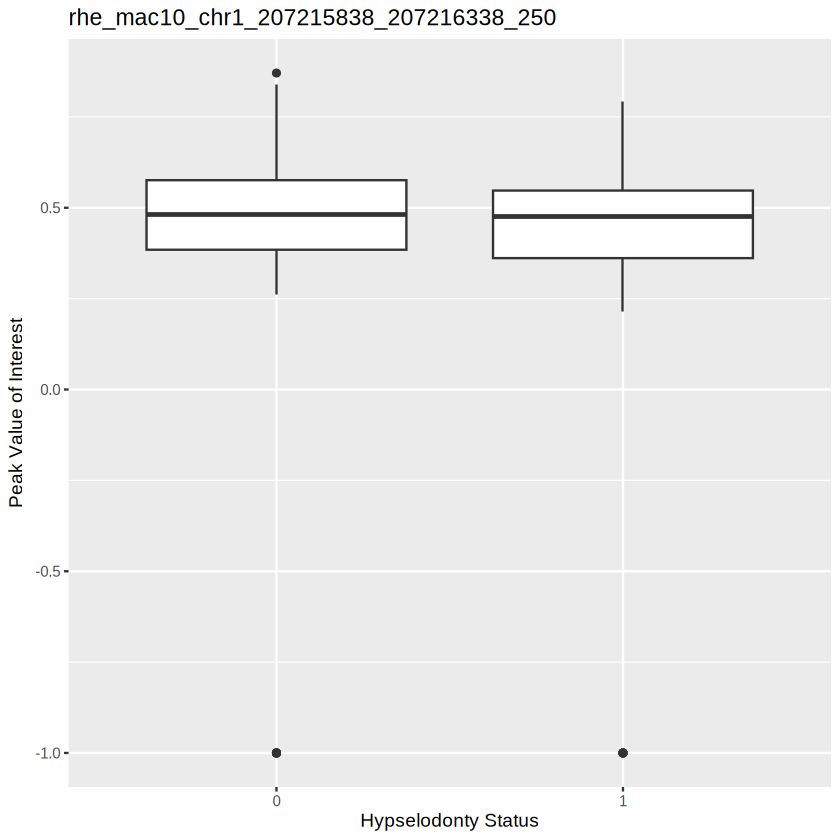

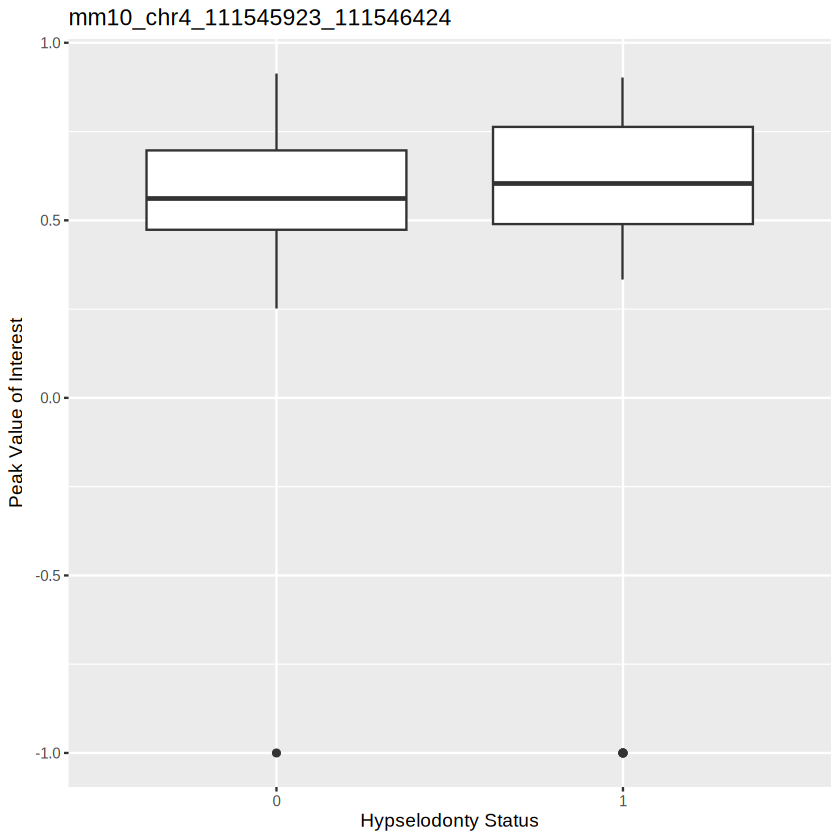

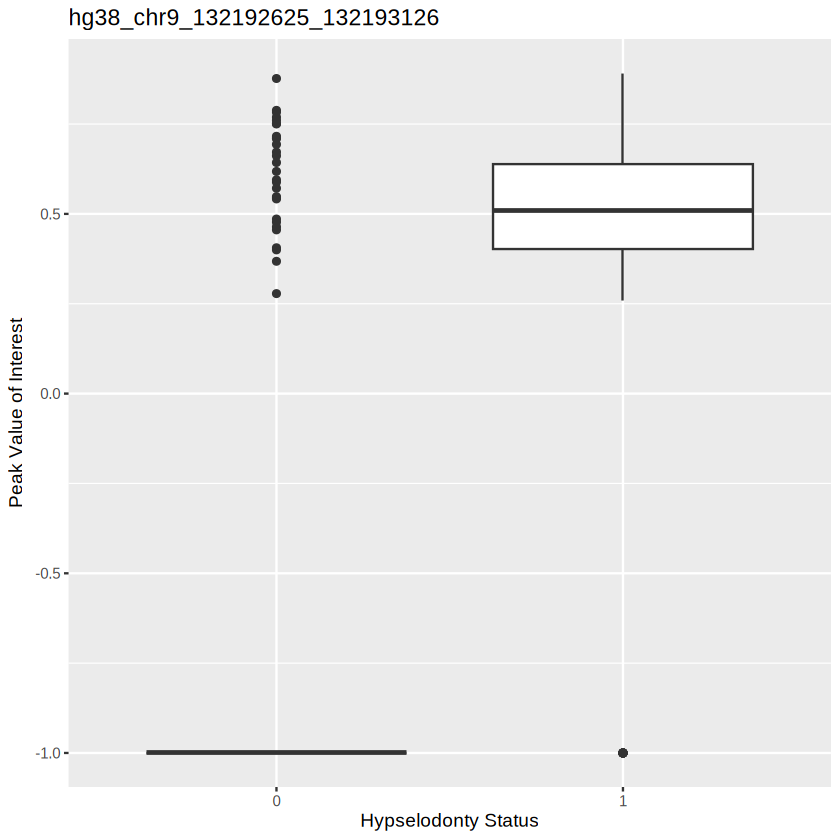

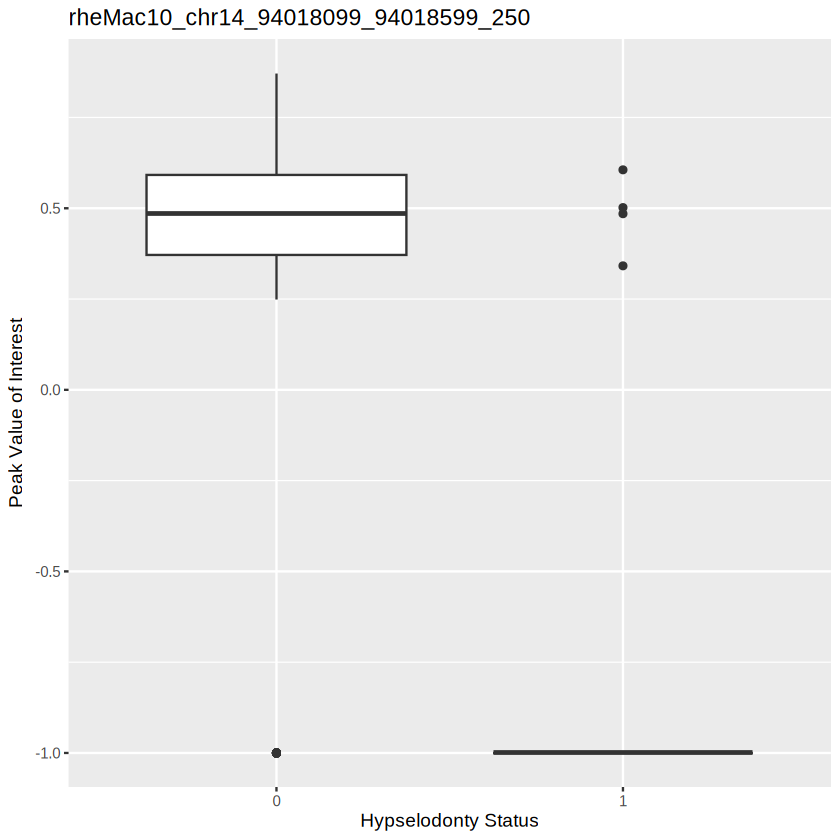

In [18]:
#barplots
combined_hyp_peaks <- read.csv("~/geb/data/hyps_opc_peaks_clean.csv")
ggplot(data = combined_hyp_peaks, aes(x = as.factor(hypselodont),
                                      y = as.numeric(rhe_mac10_chr1_207215838_207216338_250))) +
  geom_boxplot() +
  labs(x = "Hypselodonty Status",
       y = "Peak Value of Interest",
       title = "rhe_mac10_chr1_207215838_207216338_250")

ggplot(data = combined_hyp_peaks, aes(x = as.factor(hypselodont),
                                      y = as.numeric(mm10_chr4_111545923_111546424))) +
  geom_boxplot() +
  labs(x = "Hypselodonty Status",
       y = "Peak Value of Interest",
       title = "mm10_chr4_111545923_111546424")

ggplot(data = combined_hyp_peaks, aes(x = as.factor(hypselodont),
                                      y = as.numeric(hg38_chr9_132192625_132193126))) +
  geom_boxplot() +
  labs(x = "Hypselodonty Status",
       y = "Peak Value of Interest",
       title = "hg38_chr9_132192625_132193126")

ggplot(data = combined_hyp_peaks, aes(x = as.factor(hypselodont),
                                      y = as.numeric(rhe_mac10_chr14_94018099_94018599_250))) +
  geom_boxplot() +
  labs(x = "Hypselodonty Status",
       y = "Peak Value of Interest",
       title = "rheMac10_chr14_94018099_94018599_250")

#get the top 200 entries of phyloResPos and Neg
phyloResPosTop <- phyloResPos[1:200,]
phyloResNegTop <- phyloResNeg[1:200,]

#prepare to write to a bed file
#editing of the bed file into proper format is done in a separate Jupyter notebook with python
write.table(phyloResPos$id, file="phyloResPosTop.bed", sep="\t", row.names=FALSE, col.names=FALSE)
write.table(phyloResNeg$id, file="phyloResNegTop.bed", sep="\t", row.names=FALSE, col.names=FALSE)
write.table(phyloRes[1:10000,]$id, file="phyloResAll.bed", sep="\t", row.names=FALSE, col.names=FALSE)

In [ ]:
#code for cleaning BED files
#USE PYTHON KERNEL FOR THIS
import sys
import re

filename = "phyloResNegTop.bed"
with open(filename, "r") as f:
    lines = f.readlines()

new_lines = []
for l in lines:
    l = l.strip()
    #remove quotes
    l = re.sub(r'\"', "", l)
    print(l)

    l = l.split("_")

    #ALSO SUBSET: IS THE FIRST ENTRY hg38?
    #if not, skip
    if l[0] != "hg38":
        continue
    if "250" in l:
        l=l[-4:-1]
            #if we see x, we turn it into chrx
        if l[0] == "x":
            l[0] = "chrX"
        #if we see y, we turn it into chry
        if l[0] == "y":
            l[0] = "chrY"
        new_lines.append("\t".join(l))
    else:
        l=l[-3:]
            #if we see x, we turn it into chrx
        if l[0] == "x":
            l[0] = "chrX"
        #if we see y, we turn it into chry
        if l[0] == "y":
            l[0] = "chrY"
        new_lines.append("\t".join(l))

with open(filename, "w") as f:
    #write only first 200 lines
    f.write("\n".join(new_lines[:200]))
    #f.write("\n".join(new_lines))